In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the data
data = pd.read_csv("../startup data.csv")

#### Objective

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

#### About the Data

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

* agefirstfunding_year – quantitative
* agelastfunding_year – quantitative
* relationships – quantitative
* funding_rounds – quantitative
* fundingtotalusd – quantitative
* milestones – quantitative
* agefirstmilestone_year – quantitative
* agelastmilestone_year – quantitative
* state – categorical
* industry_type – categorical
* has_VC – categorical
* has_angel – categorical
* has_roundA – categorical
* has_roundB – categorical
* has_roundC – categorical
* has_roundD – categorical
* avg_participants – quantitative
* is_top500 – categorical

* **status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)** 

In [3]:
data.head().T

,0,1,2,3,4
Unnamed: 0,1005,204,1001,738,1002
state_code,CA,CA,CA,CA,CA
latitude,42.3589,37.2389,32.901,37.3203,37.7793
longitude,-71.0568,-121.974,-117.193,-122.05,-122.419
zip_code,92101,95032,92121,95014,94105
id,c:6669,c:16283,c:65620,c:42668,c:65806
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
Unnamed: 6,NaN,NaN,San Diego CA 92121,Cupertino CA 95014,San Francisco CA 94105
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0


In [4]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [5]:
data.duplicated().any()

False

In [6]:
data.shape

(923, 49)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
data.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.0,5.722979e+02,3.335854e+02,1.000000,2.835000e+02,5.770000e+02,8.665000e+02,1.153000e+03
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
labels,923.0,6.468039e-01,4.782221e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [10]:
# id and name have the same number of uique values and no null values.
# Data might be duplicated
data.describe(include=[np.object]).T

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [4]:
startup = data.drop(["Unnamed: 0", "Unnamed: 6"], axis=1)
startup.shape

(923, 47)

In [12]:
# Both entries are almost identical. The only difference is the longitude and latitude
(startup[startup["id"] == "c:28482"]).T

,124,832
state_code,CA,CA
latitude,37.5483,37.4815
longitude,-121.989,-121.945
zip_code,94538,94538
id,c:28482,c:28482
city,Fremont,Fremont
name,Redwood Systems,Redwood Systems
labels,1,1
founded_at,1/1/2008,1/1/2008
closed_at,NaN,NaN


In [5]:
startup.drop(832, inplace=True)
startup.shape

(922, 47)

In [14]:
(startup["state_code"] == startup["state_code.1"]).sum()

921

In [15]:
startup["state_code.1"].isna().sum()

1

In [16]:
(startup["id"] == startup["object_id"]).sum()

922

In [6]:
to_drop = ["state_code.1", "object_id", "zip_code", "id", "city", "labels"]

In [7]:
startup.drop(to_drop, inplace=True, axis=1)

In [19]:
startup.shape

(922, 41)

In [42]:
startup.astype?

In [8]:
dates = ["founded_at", "first_funding_at", "last_funding_at"]

for date in dates:
    startup[date] = startup[date].astype("datetime64")

In [9]:
col_list = startup.columns.to_list()

In [21]:
for column in col_list:
    if startup[column].nunique() < 60 and startup[column].nunique() > 2:
        print(f"{column}:", startup[column].nunique())

state_code: 35
relationships: 41
funding_rounds: 9
milestones: 8
category_code: 35
avg_participants: 59


In [22]:
for column in col_list:
    if startup[column].nunique() == 2:
        print(f"{column}:", startup[column].nunique())

is_CA: 2
is_NY: 2
is_MA: 2
is_TX: 2
is_otherstate: 2
is_software: 2
is_web: 2
is_mobile: 2
is_enterprise: 2
is_advertising: 2
is_gamesvideo: 2
is_ecommerce: 2
is_biotech: 2
is_consulting: 2
is_othercategory: 2
has_VC: 2
has_angel: 2
has_roundA: 2
has_roundB: 2
has_roundC: 2
has_roundD: 2
is_top500: 2
status: 2


### Cleaning up zip code

In [ ]:
startup["zip_code"].sample(10)

In [ ]:
startup["zip_code"].isna().sum()

In [ ]:
regex = r"^(\d{5})"

In [ ]:
extr = startup["zip_code"].str.extract(regex, expand=False)
extr.sample(10)

In [ ]:
extr.isna().sum()

In [ ]:
common = extr.mode()[0]
extr = extr.fillna(common)
extr.isna().sum()

In [ ]:
startup["zip_code"] = extr

In [10]:
sns.set(rc={"figure.figsize":(15, 8)})

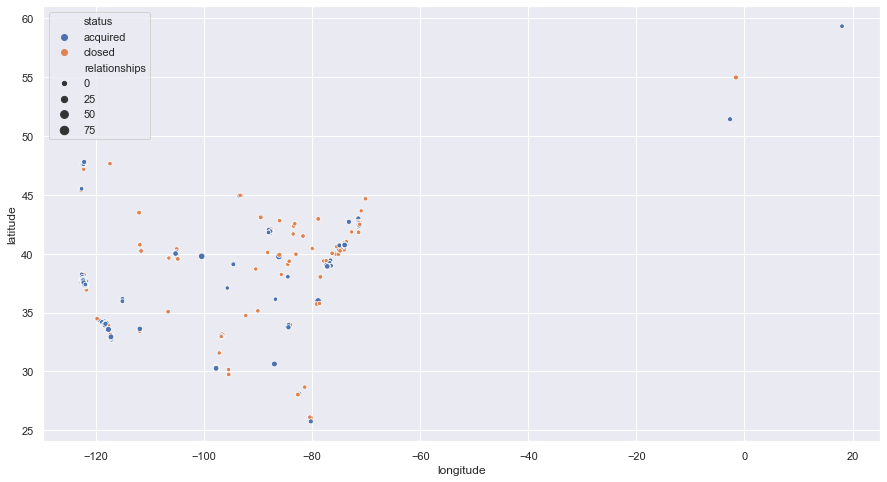

In [25]:
# Visualising the location of acquired and closed startups
sns.scatterplot(
    data=startup, 
    x="longitude", 
    y="latitude", 
    size="relationships", 
    hue="status")

## Univariate analysis

### Continuous data

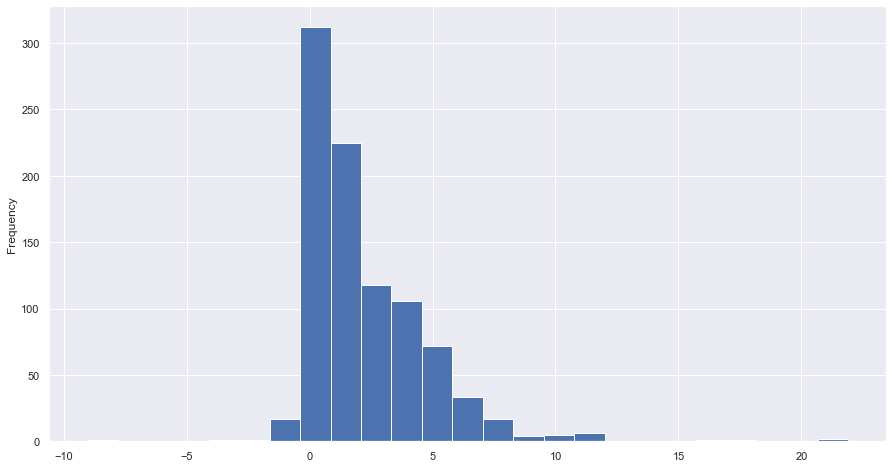

In [26]:
startup["age_first_funding_year"].plot.hist(bins=25);

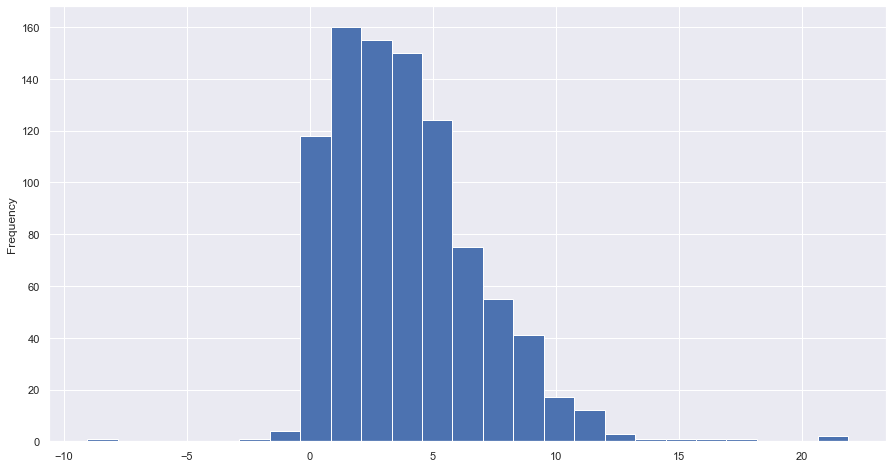

In [27]:
startup["age_last_funding_year"].plot.hist(bins=25);

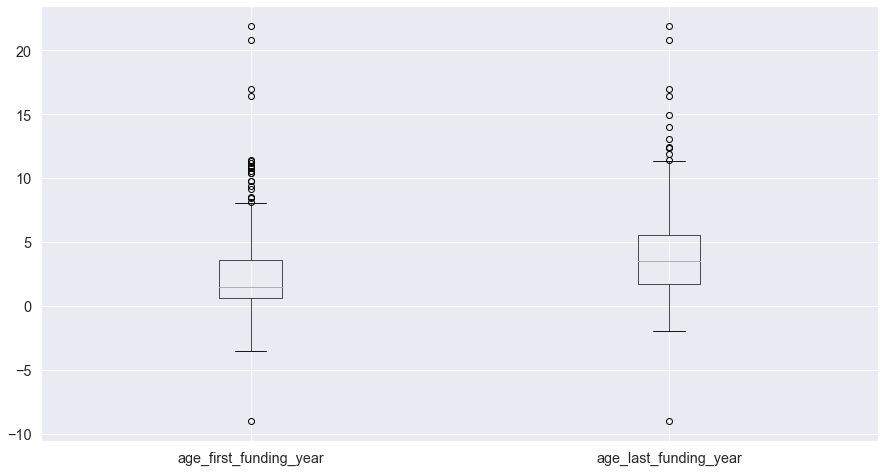

In [28]:
startup.boxplot(column=["age_first_funding_year", "age_last_funding_year"], fontsize="large");

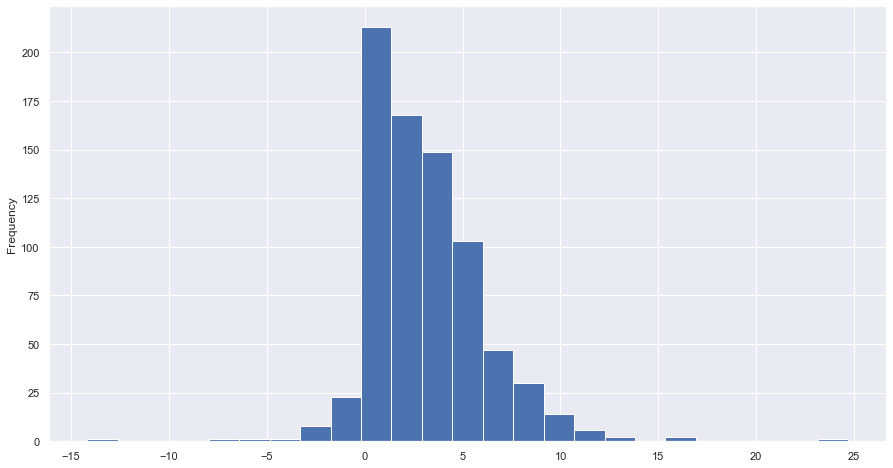

In [29]:
startup.age_first_milestone_year.plot.hist(bins=25);

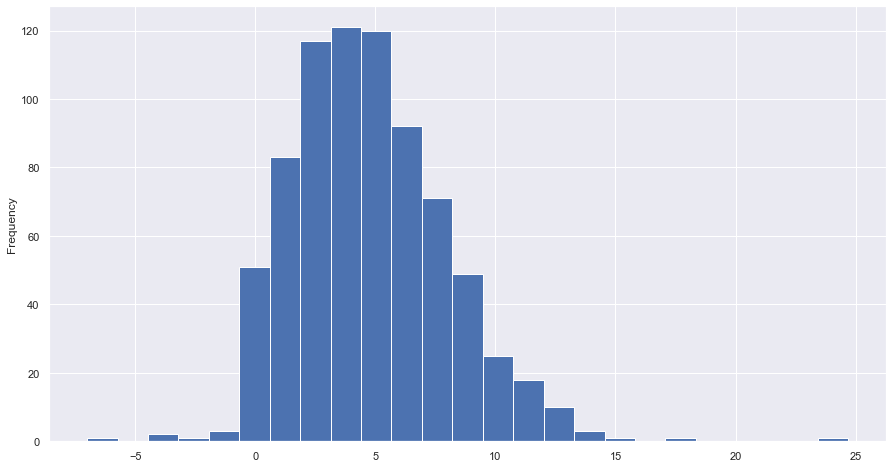

In [30]:
startup.age_last_milestone_year.plot.hist(bins=25);

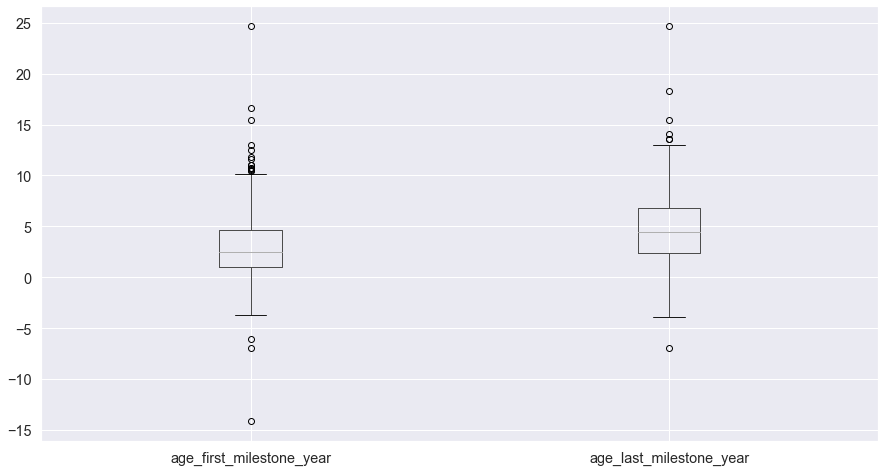

In [31]:
startup.boxplot(column=["age_first_milestone_year", "age_last_milestone_year"], fontsize="large");

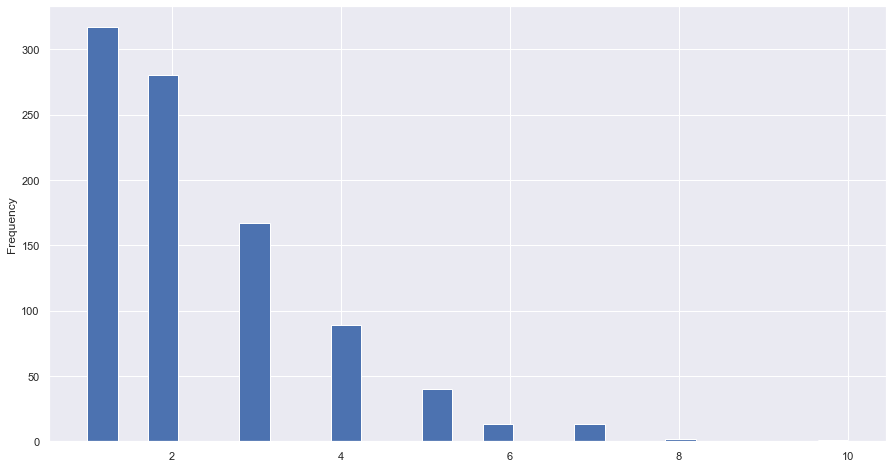

In [32]:
startup.funding_rounds.plot.hist(bins=25,);

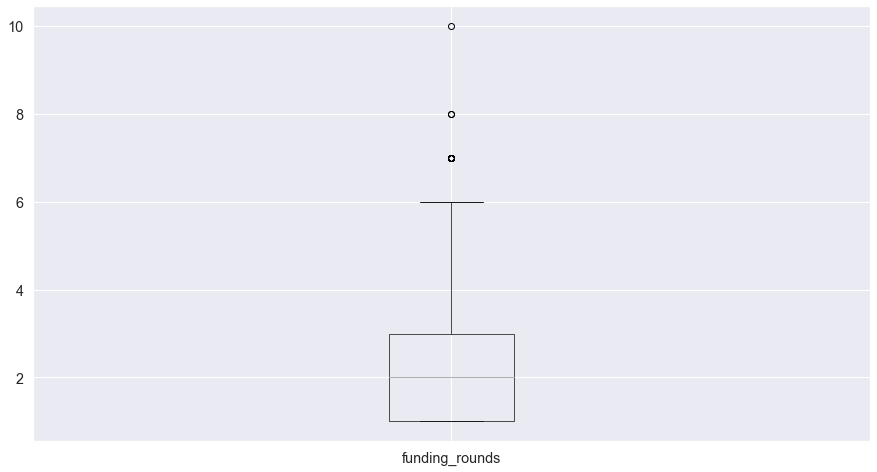

In [33]:
startup.boxplot(column="funding_rounds", fontsize="large");

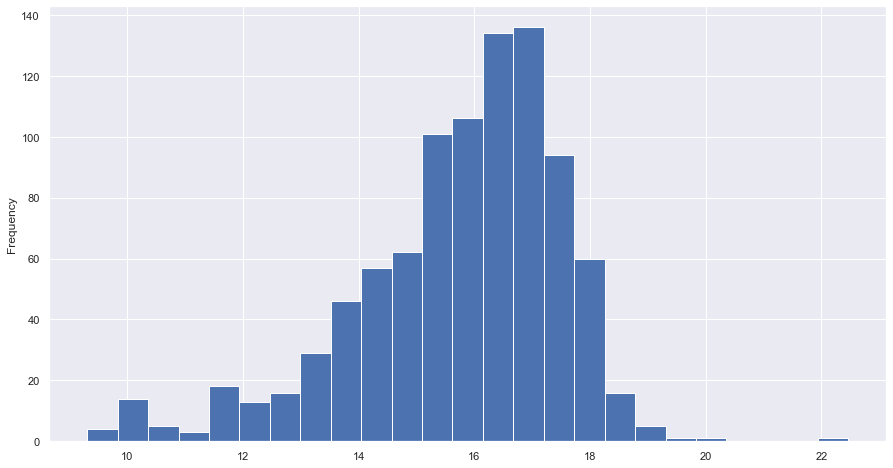

In [34]:
np.log(startup.funding_total_usd).plot.hist(bins=25);

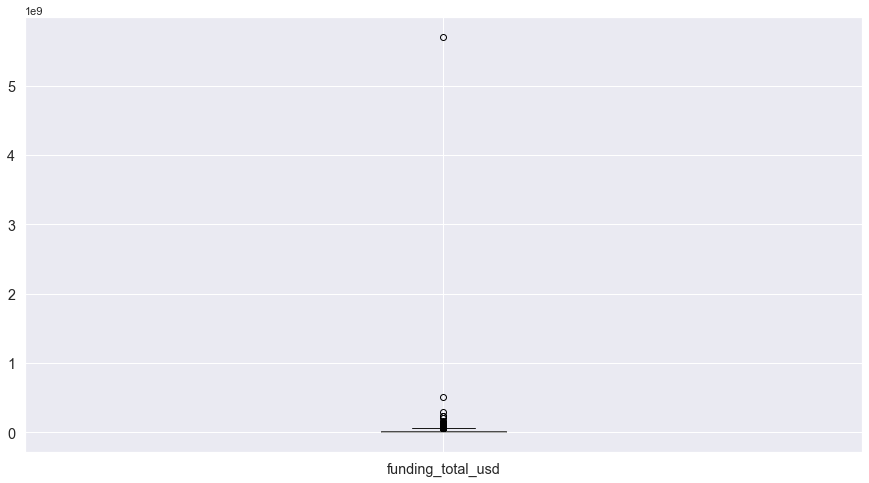

In [35]:
startup.boxplot(column="funding_total_usd", fontsize="large");

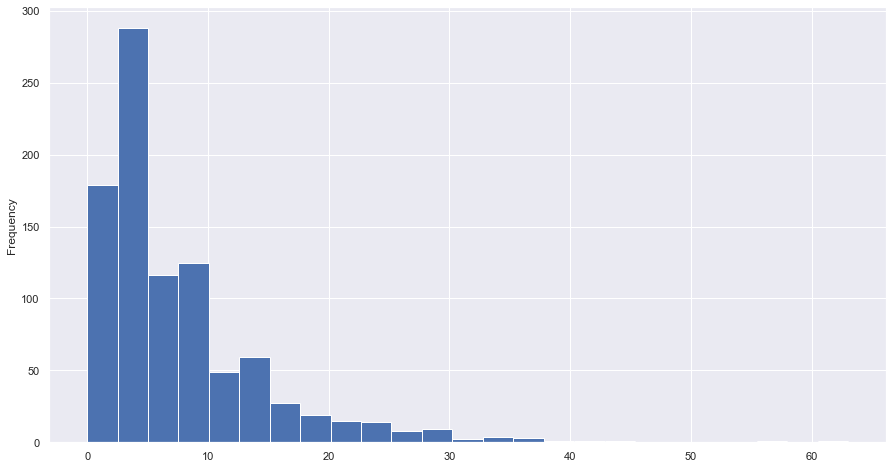

In [36]:
startup.relationships.plot.hist(bins=25);

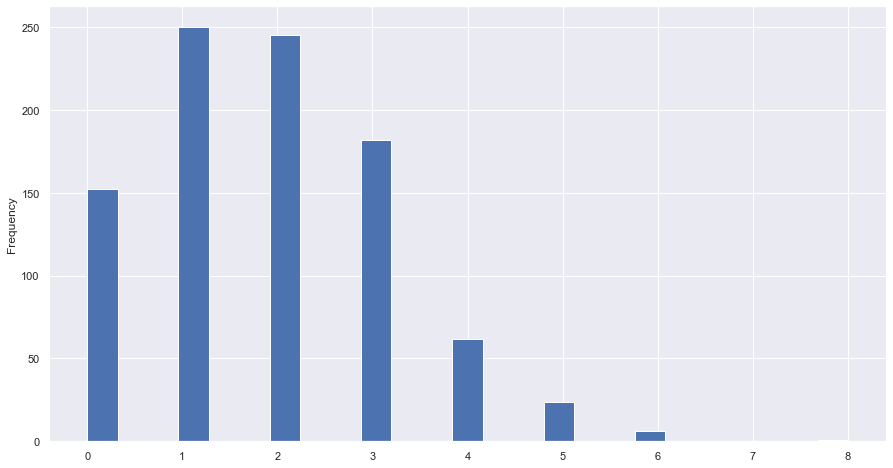

In [37]:
startup.milestones.plot.hist(bins=25);

In [ ]:
startup.avg_participants.plot.hist(bins=25);

### Categorical data

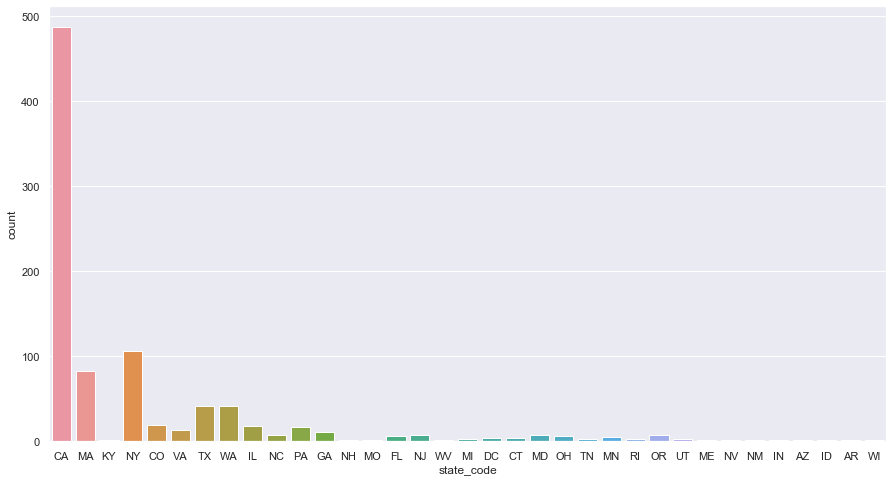

In [38]:
sns.countplot(x="state_code", data=startup)

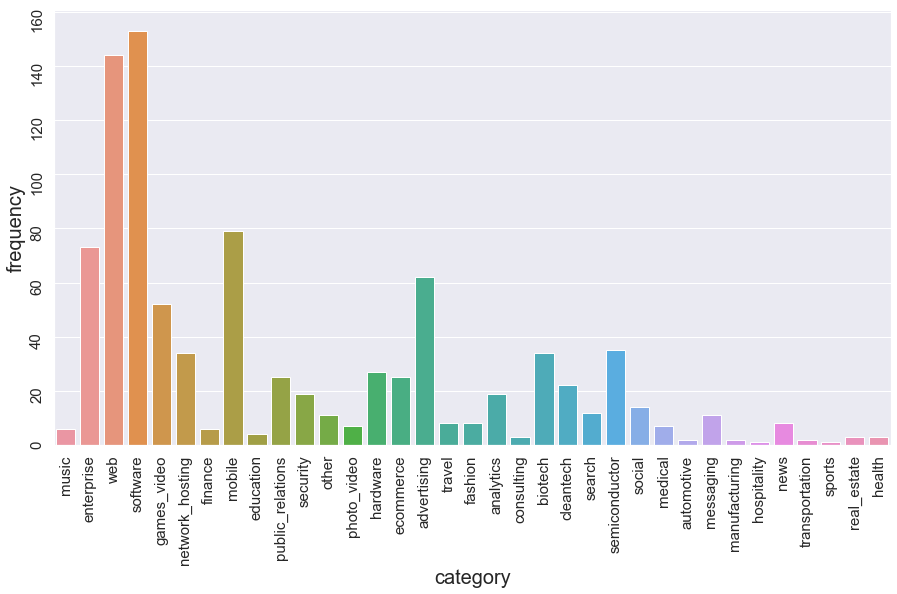

In [39]:
sns.countplot(data=startup, x="category_code")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

In [ ]:
startup.city.nunique()

In [ ]:
# There are 221 unique cities... It's a little hard to visualise
sns.countplot(data=startup, x="city")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

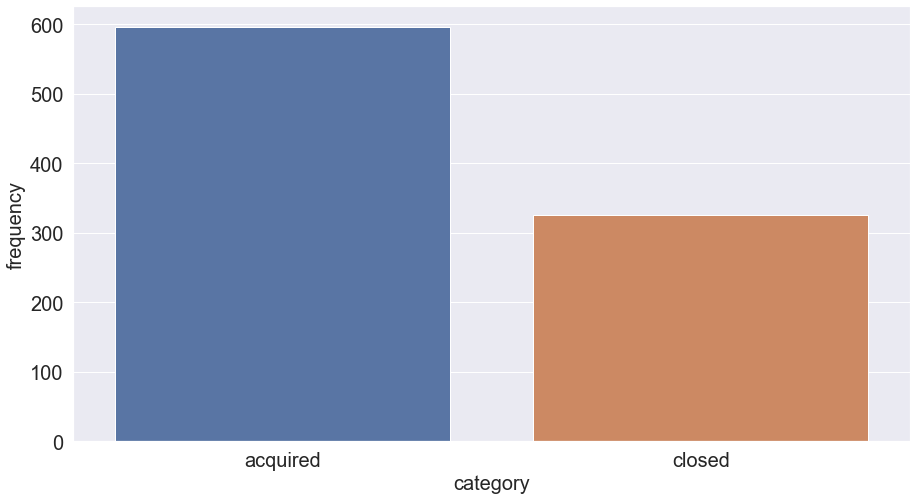

In [47]:
sns.countplot(data=startup, x="status")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=20);

### Cleaning the milestone year columns

In [49]:
startup[["age_first_milestone_year", "age_last_milestone_year"]].isna().sum()

age_first_milestone_year    152
age_last_milestone_year     152
dtype: int64

In [11]:
startup["age_first_milestone_year"] = startup["age_first_milestone_year"].fillna(0)
startup["age_last_milestone_year"] = startup["age_last_milestone_year"].fillna(0)

In [50]:
startup.isna().sum()

state_code                    0
latitude                      0
longitude                     0
name                          0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [ ]:
startup["closed_at"].sample(10)

### Removing outliers?

In [12]:
num_types = ["int64", "float64"]

In [13]:
numericals = []
for column in col_list:
    if len(startup[column].unique()) == 2:
        pass
    elif startup[column].dtype in num_types:
        numericals.append(column)
        
print(numericals) 

['latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants']


In [ ]:
startup_num = pd.DataFrame([startup[numerical] for numerical in numericals]).T
startup_num.head()

In [ ]:
startup_num = startup_num.drop(["latitude", "longitude"], axis=1)

In [ ]:
startup_num.shape

In [ ]:
startup_num.isna().sum()

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(startup_num))
print(z)

In [ ]:
# threshold = 3
startup_num = startup_num[(z < 3).all(axis=1)]
startup_num.shape
# If we remove outliers, we will be reduced to 847 rows. Tha's not okay
# Is there a better way to handle outliers?

In [ ]:
df = startup

In [ ]:
df.shape

In [ ]:
df = df.loc[startup_num.index]
df.shape

In [ ]:
sns.boxplot(data=df, x="status", y="age_first_funding_year")

#### Other alternatives are to mark outliers or rescale the data

## Multivariate analysis

### Continuous vs Continuous variables

In [53]:
startup.corr()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
latitude,1.000000,0.368378,-0.047056,-0.041645,-0.041008,-0.017672,-0.038955,-0.000295,-0.072931,0.017745,...,-0.033924,-0.039267,0.031513,0.028722,-0.032795,-0.011437,-0.057322,-0.018927,-0.018272,0.032826
longitude,0.368378,1.000000,-0.014692,-0.000003,-0.054800,-0.083767,-0.072480,0.023558,0.018018,-0.016320,...,0.021201,-0.045336,0.026173,0.101536,-0.065469,-0.065986,-0.040778,-0.043169,-0.045490,-0.091525
age_first_funding_year,-0.047056,-0.014692,1.000000,0.762641,0.382518,0.237009,-0.187374,-0.154854,0.046388,-0.295876,...,-0.012635,0.116730,0.169281,-0.346488,-0.292661,-0.059797,0.034617,0.121155,0.114190,0.050964
age_last_funding_year,-0.041645,-0.000003,0.762641,1.000000,0.529759,0.436373,0.072958,0.386099,0.116365,-0.122929,...,0.029723,0.091769,0.351189,-0.354438,-0.099990,0.258930,0.317721,0.312421,0.122956,0.200670
age_first_milestone_year,-0.041008,-0.054800,0.382518,0.529759,1.000000,0.813274,0.310668,0.203713,0.063753,0.198460,...,0.037789,-0.017066,0.071352,-0.198468,0.073761,0.195933,0.168740,0.224281,0.052267,0.168587
age_last_milestone_year,-0.017672,-0.083767,0.237009,0.436373,0.813274,1.000000,0.411870,0.257743,0.086555,0.543106,...,0.019947,-0.059187,0.042519,-0.142885,0.170494,0.251895,0.208422,0.211161,0.072450,0.212926
relationships,-0.038955,-0.072480,-0.187374,0.072958,0.310668,0.411870,1.000000,0.358175,0.093785,0.513935,...,0.078375,-0.075439,-0.030335,-0.060111,0.316501,0.284200,0.258705,0.207897,0.115409,0.221870
funding_rounds,-0.000295,0.023558,-0.154854,0.386099,0.203713,0.257743,0.358175,1.000000,0.115832,0.230191,...,0.028403,-0.014706,0.333579,0.011387,0.259646,0.443541,0.439669,0.324338,0.043495,0.258946
funding_total_usd,-0.072931,0.018018,0.046388,0.116365,0.063753,0.086555,0.093785,0.115832,1.000000,0.012050,...,-0.001826,-0.012019,0.009999,-0.059631,-0.023783,0.020073,0.045394,0.045166,0.046269,0.048960
milestones,0.017745,-0.016320,-0.295876,-0.122929,0.198460,0.543106,0.513935,0.230191,0.012050,1.000000,...,0.006841,-0.136827,-0.093631,0.128356,0.320029,0.195166,0.085247,0.020708,0.043577,0.171373


In [ ]:
# age_first_funding_year and age_last_funding_year are highly correlated (0.762641)
# age_first_milestone_year and age_last_milestone_year are also highly correlated (0.777488)

In [ ]:
# All these lines in the scatter plots...

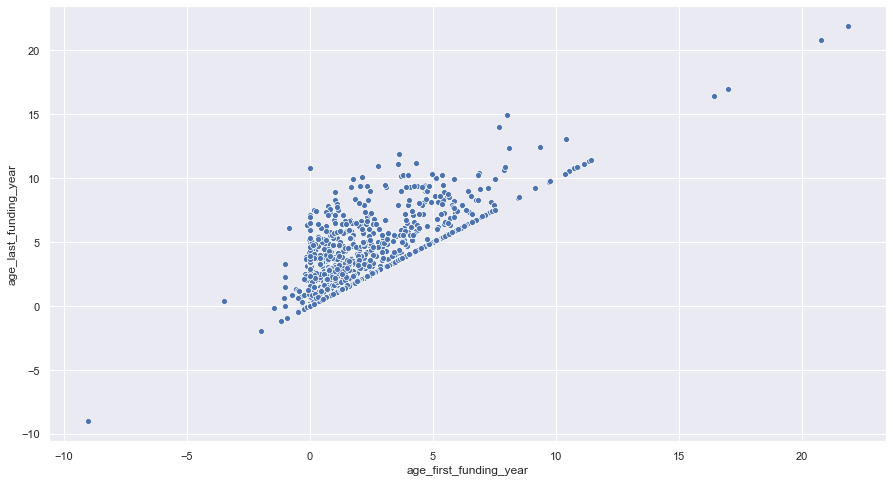

In [54]:
sns.scatterplot(data=startup, x="age_first_funding_year", y="age_last_funding_year")

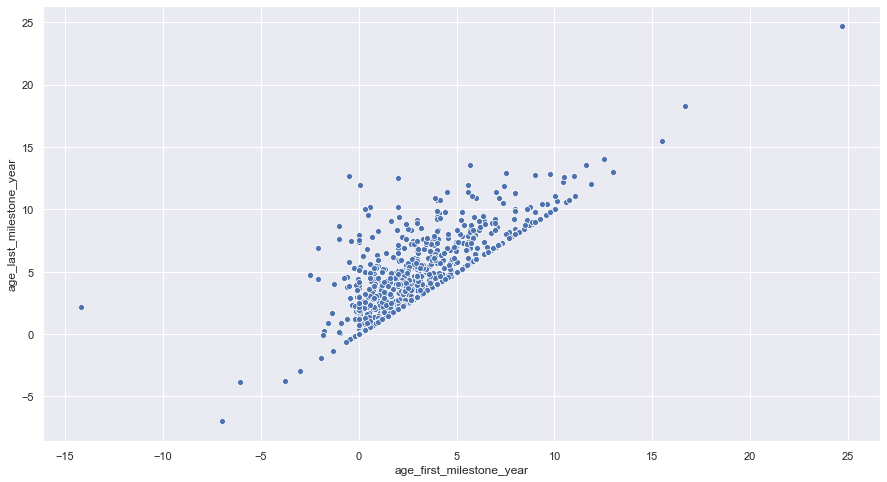

In [55]:
sns.scatterplot(data=startup, x="age_first_milestone_year", y="age_last_milestone_year")

In [ ]:
# The lines around 3 and 5 show where we imputed the mean for missing values

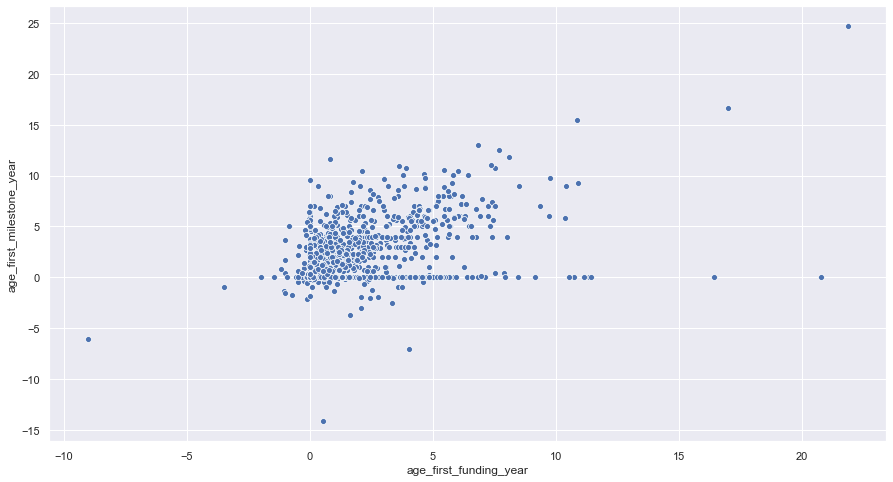

In [56]:
sns.scatterplot(data=startup, x="age_first_funding_year", y="age_first_milestone_year")

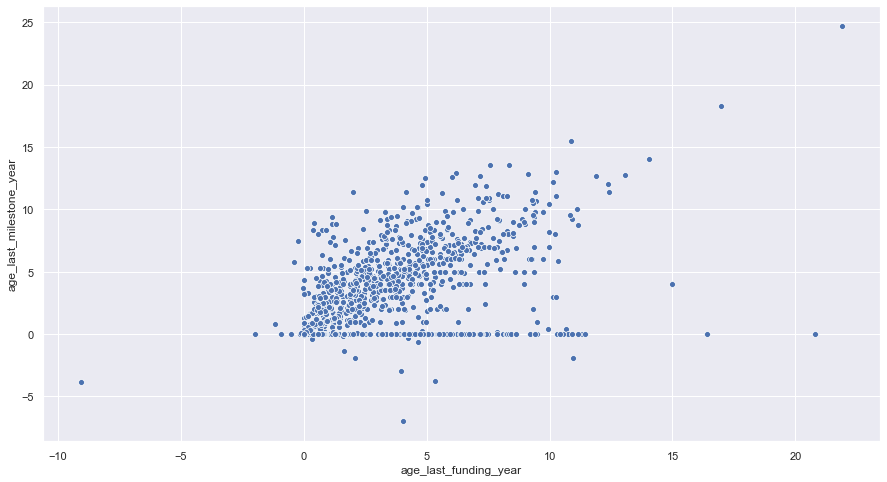

In [57]:
sns.scatterplot(data=startup, x="age_last_funding_year", y="age_last_milestone_year")

### Continuous vs Categorical

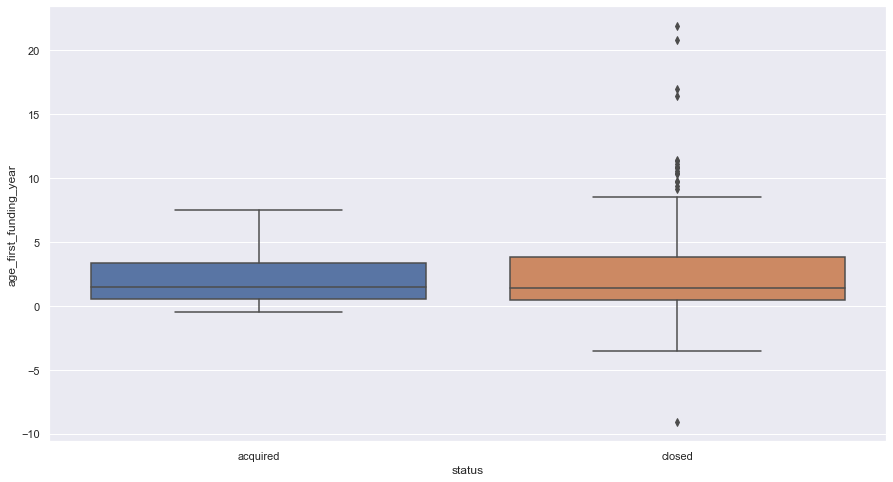

In [58]:
sns.boxplot(data=startup, x="status", y="age_first_funding_year")

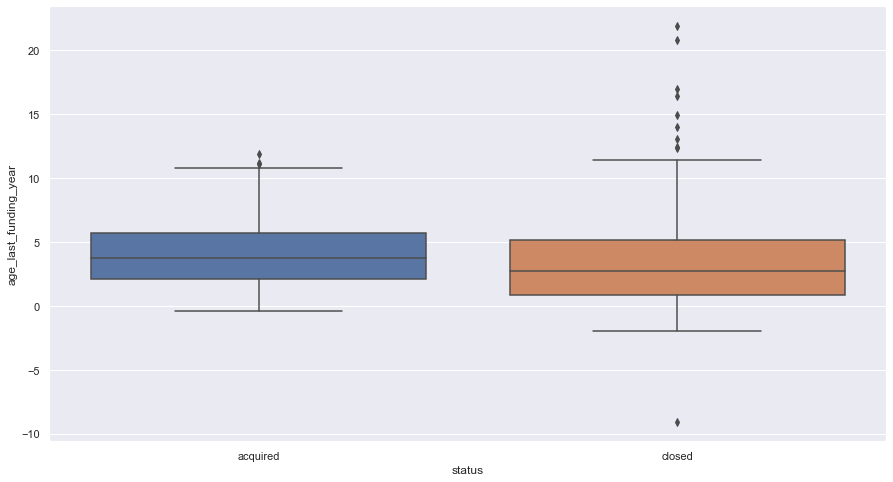

In [59]:
sns.boxplot(data=startup, x="status", y="age_last_funding_year")

In [14]:
# np.ceil rounds everything up i.e, 1.1 becomes 2, 3.5 becomes 4
startup["funding_age"] = np.ceil(startup["age_first_funding_year"])

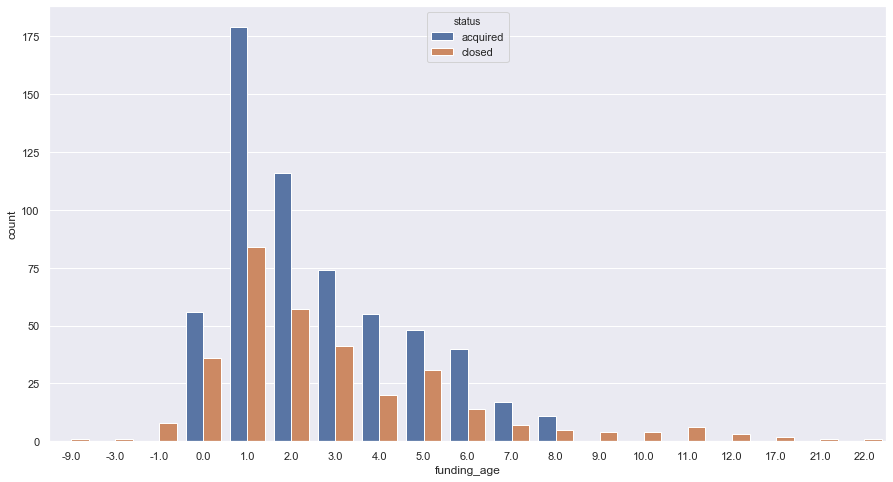

In [61]:
# startups in their first funding years got acquired the most and as the years increase, the number of acquired startups decreases
# Beyond 8 years, acquisition stops
sns.countplot(data=startup, x="funding_age", hue="status")

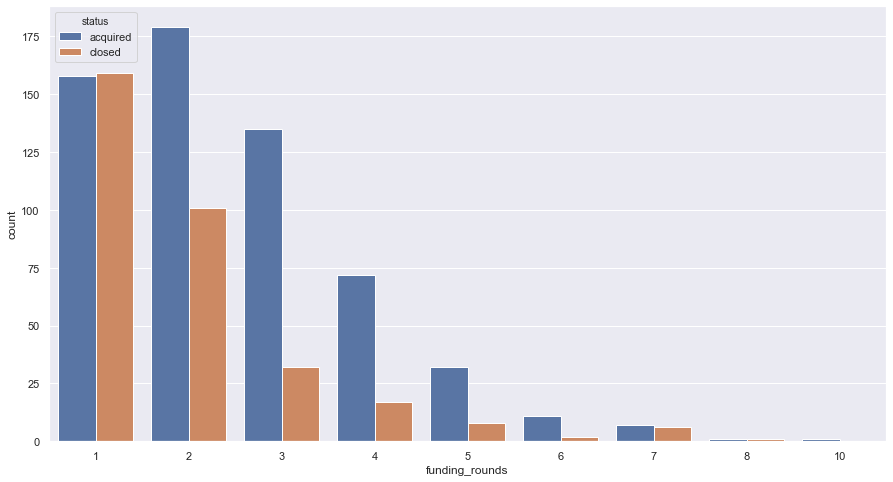

In [63]:
# Startups with funding rounds of 1, 2 and 3 had more acquisitions than those with higher rounds.
# Could be a because most startups have funding rounds of 1, 2 0r 3
sns.countplot(data=startup, x="funding_rounds", hue="status")

In [15]:
startup["funding_bins"] = pd.cut(startup["funding_total_usd"], [1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])

In [65]:
# Total funding in each category
cat_fund = pd.DataFrame(startup["funding_total_usd"].groupby(startup["category_code"]).sum())
cat_fund = cat_fund.reset_index()

In [66]:
# 5 categories with the lowest funds
cat_fund.sort_values(by="funding_total_usd")[:5]

,category_code,funding_total_usd
31,sports,2000000
14,hospitality,3750000
15,manufacturing,4662000
25,real_estate,7347782
7,education,43263835


In [111]:
startup[startup["category_code"] == "sports"][["name", "category_code", "funding_total_usd", "founded_year"]]

,name,category_code,funding_total_usd,founded_year
323,Hitpost,sports,2000000,2009


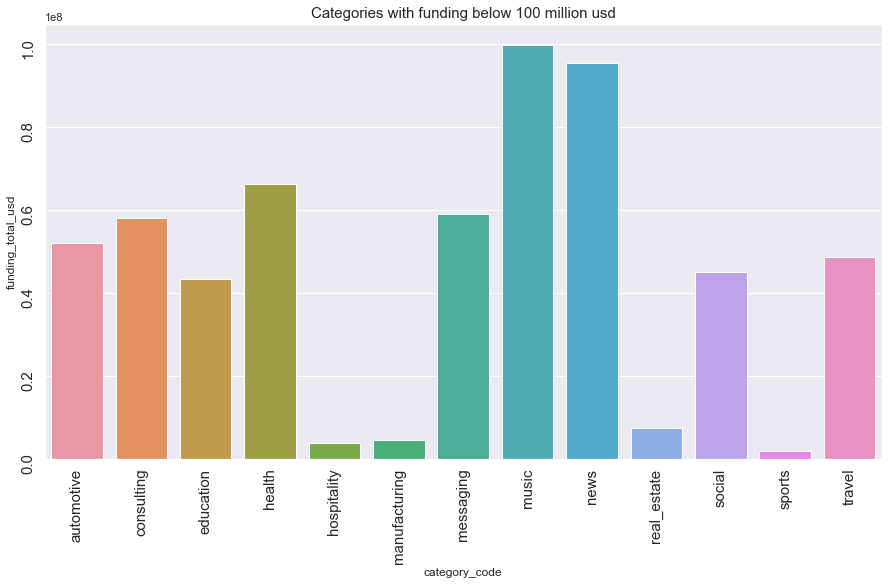

In [67]:
# sports has the lowest funds probably because there was only one spors startup
# Need to change values on the y-axis to show the amount of money
sns.barplot(data=cat_fund, 
              x=cat_fund["category_code"].where(cat_fund["funding_total_usd"] < 100000000),
              y=cat_fund["funding_total_usd"].where(cat_fund["funding_total_usd"] < 100000000)
             )

plt.title("Categories with funding below 100 million usd", fontsize=15)     
plt.tick_params(labelsize=15, labelrotation=90);

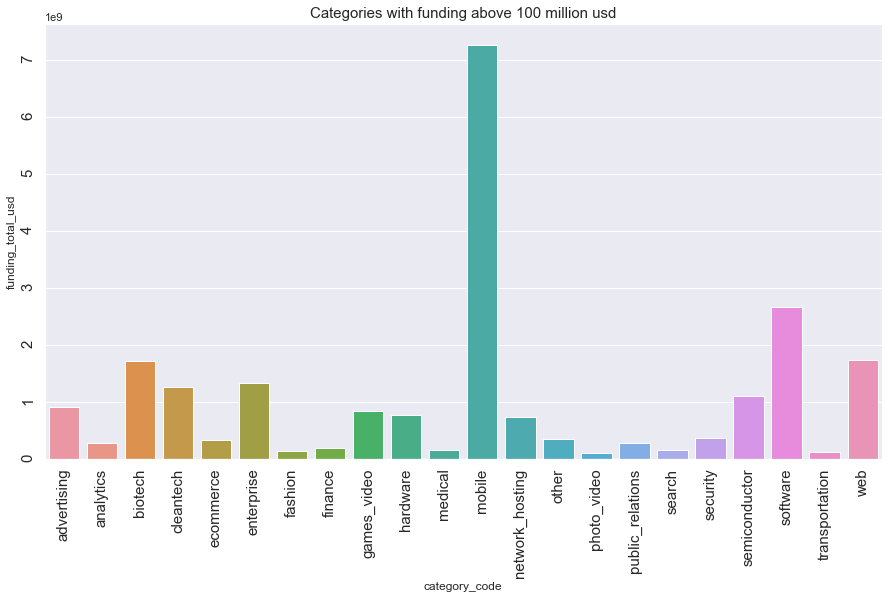

In [68]:
sns.barplot(data=cat_fund, 
              x=cat_fund["category_code"].where(cat_fund["funding_total_usd"] > 100000000),
              y=cat_fund["funding_total_usd"].where(cat_fund["funding_total_usd"] > 100000000)
             )

# plt.yticks
plt.title("Categories with funding above 100 million usd", fontsize=15)          
plt.tick_params(labelsize=15, labelrotation=90);

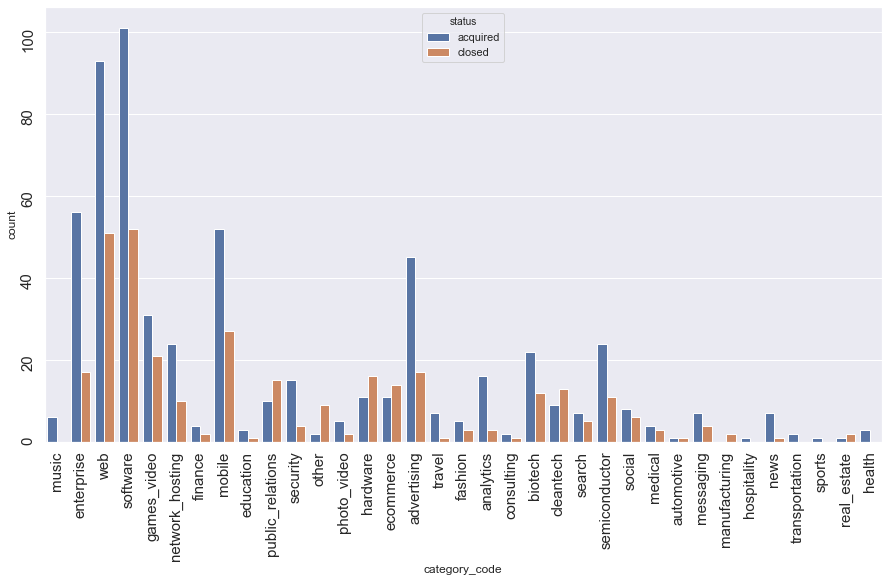

In [146]:
sns.countplot(x = "category_code", data = startup, hue = "status")
plt.tick_params(labelsize=15, labelrotation=90);

In [16]:
startup["founded_year"] = pd.DatetimeIndex(startup["founded_at"]).year

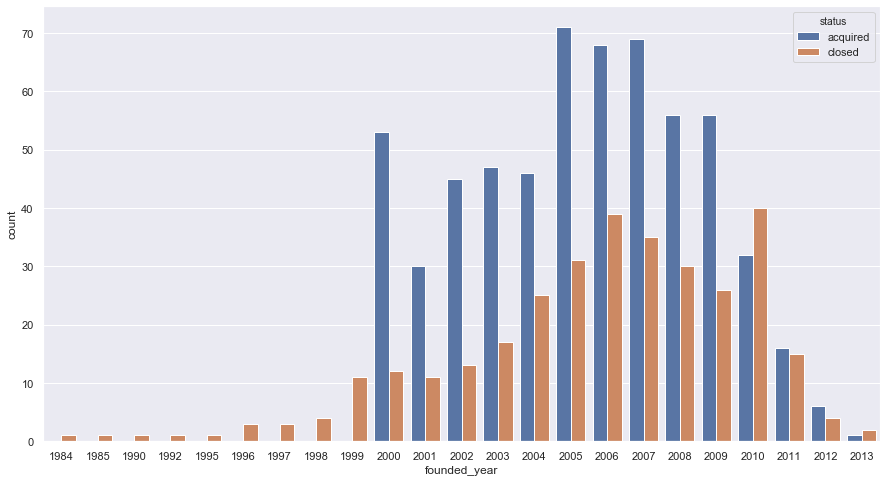

In [106]:
sns.countplot(x = "founded_year", data = startup, hue ="status")

In [115]:
pd.period_range("1984-01-01", "1999-12-31", freq="Y")

PeriodIndex(['1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
             '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999'],
            dtype='period[A-DEC]', freq='A-DEC')

In [132]:
startup[startup["founded_year"] < 2000]["category_code"].value_counts()

software            8
biotech             6
hardware            3
semiconductor       2
network_hosting     1
cleantech           1
games_video         1
enterprise          1
security            1
other               1
public_relations    1
Name: category_code, dtype: int64

In [156]:
# 20th century startups
century_20 = startup[startup["founded_year"] < 2000][["founded_year", "category_code", "funding_total_usd", "is_top500", "status"]]
century_20.head()

,founded_year,category_code,funding_total_usd,is_top500,status
15,1999,public_relations,200000,0,closed
60,1999,biotech,19009671,1,closed
66,1999,software,20500000,1,closed
76,1998,software,17800000,1,closed
100,1985,software,32000000,1,closed


In [161]:
# 21st century startups
century_21 = startup[startup["founded_year"] >= 2000][["founded_year", "category_code", "funding_total_usd", "funding_bins", "is_top500", "status", ]]
century_21

,founded_year,category_code,funding_total_usd,funding_bins,is_top500,status
0,2007,music,375000,"(100000.0, 1000000.0]",0,acquired
1,2000,enterprise,40100000,"(10000000.0, 100000000.0]",1,acquired
2,2009,web,2600000,"(1000000.0, 10000000.0]",1,acquired
3,2002,software,40000000,"(10000000.0, 100000000.0]",1,acquired
4,2010,games_video,1300000,"(1000000.0, 10000000.0]",1,closed
...,...,...,...,...,...,...
916,2006,advertising,18000000,"(10000000.0, 100000000.0]",1,acquired
917,2000,mobile,122500000,"(100000000.0, 1000000000.0]",1,acquired
918,2009,advertising,1100000,"(1000000.0, 10000000.0]",1,acquired
921,2009,software,15500000,"(10000000.0, 100000000.0]",1,acquired


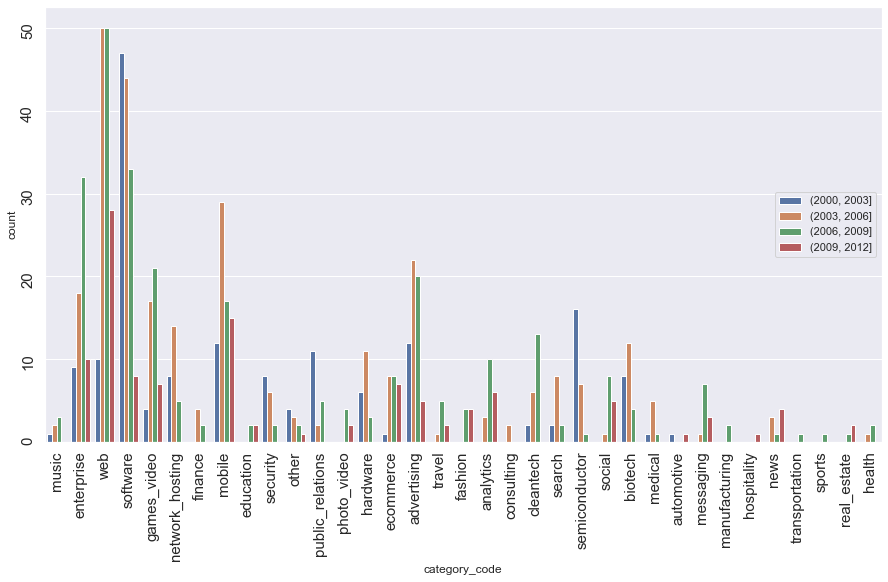

In [162]:
#  A lot of web startups were founded between 2003 and 2009... did they succeed?
# The highest number of software startups were created between(2000 and 2006)... Software has the highest number of startups
# in general
sns.countplot(data=century_21, 
              x="category_code", 
              hue=pd.cut(century_21["founded_year"], [2000, 2003, 2006, 2009, 2012])
             )

plt.title("21st centur startup categories", fontsize=15) 
plt.tick_params(labelsize=15, labelrotation=90)
plt.legend(loc="right");

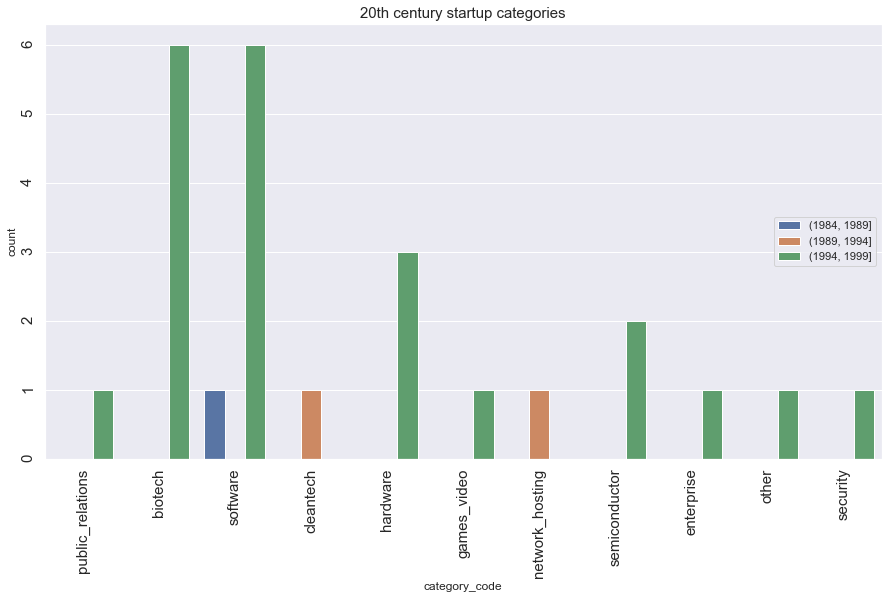

In [173]:
sns.countplot(data=century_20, 
              x="category_code", 
              hue=pd.cut(century_20["founded_year"], [1984, 1989, 1994, 1999]),
           )

plt.title("20th century startup categories", fontsize=15) 
plt.tick_params(labelsize=15, labelrotation=90)
plt.legend(loc="right");
# Most of the 20th century startups were founded between 1994 and 1999

In [12]:
clean_startup = startup

In [18]:
startup.columns

Index(['state_code', 'latitude', 'longitude', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [17]:
startup["status"].replace("acquired", 1, inplace=True)
startup["status"].replace("closed", 0, inplace=True)

In [20]:
to_drop2 = ["state_code", "latitude", "longitude", "name", "closed_at",
            "category_code", "founded_at", "first_funding_at", "last_funding_at",
            "status", "age_first_funding_year", "age_first_milestone_year", 
            "founded_year", "funding_bins", "funding_age"]

In [21]:
startup_num = startup.drop(to_drop2, axis=1)

In [ ]:
startup

In [22]:
startup_label = startup["status"]

In [191]:
startup_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_last_funding_year    923 non-null    float64
 1   age_last_milestone_year  923 non-null    float64
 2   relationships            923 non-null    int64  
 3   funding_rounds           923 non-null    int64  
 4   funding_total_usd        923 non-null    int64  
 5   milestones               923 non-null    int64  
 6   is_CA                    923 non-null    int64  
 7   is_NY                    923 non-null    int64  
 8   is_MA                    923 non-null    int64  
 9   is_TX                    923 non-null    int64  
 10  is_otherstate            923 non-null    int64  
 11  is_software              923 non-null    int64  
 12  is_web                   923 non-null    int64  
 13  is_mobile                923 non-null    int64  
 14  is_enterprise            9

In [57]:
startup_label.isna().sum()

0

In [32]:
startup_label.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

In [70]:
startup.corr()["status"]

latitude                    0.046560
longitude                  -0.036092
age_first_funding_year     -0.075637
age_last_funding_year       0.073731
age_first_milestone_year    0.250163
age_last_milestone_year     0.358600
relationships               0.360434
funding_rounds              0.206049
funding_total_usd           0.040176
milestones                  0.328260
is_CA                       0.077217
is_NY                       0.059996
is_MA                       0.081735
is_TX                      -0.045309
is_otherstate              -0.169067
is_software                 0.012429
is_web                     -0.000873
is_mobile                   0.007312
is_enterprise               0.073772
is_advertising              0.044355
is_gamesvideo              -0.025893
is_ecommerce               -0.072193
is_biotech                  0.000104
is_consulting               0.002373
is_othercategory           -0.042408
has_VC                     -0.056515
has_angel                  -0.072840
h

In [192]:
startup_num.skew()

age_last_funding_year       1.092075
age_last_milestone_year     0.747608
relationships               2.329961
funding_rounds              1.356917
funding_total_usd          29.152461
milestones                  0.577378
is_CA                      -0.110859
is_NY                       2.419983
is_MA                       2.871600
is_TX                       4.368738
is_otherstate               1.346897
is_software                 1.800532
is_web                      1.899024
is_mobile                   2.967450
is_enterprise               3.124329
is_advertising              3.463826
is_gamesvideo               3.854605
is_ecommerce                5.835966
is_biotech                  4.925864
is_consulting              17.483222
is_othercategory            0.758938
has_VC                      0.743076
has_angel                   1.128435
has_roundA                 -0.032560
has_roundB                  0.442307
has_roundC                  1.265662
has_roundD                  2.677051
a

In [193]:
corr = startup_num.corr()

<Figure size 1440x1440 with 0 Axes>

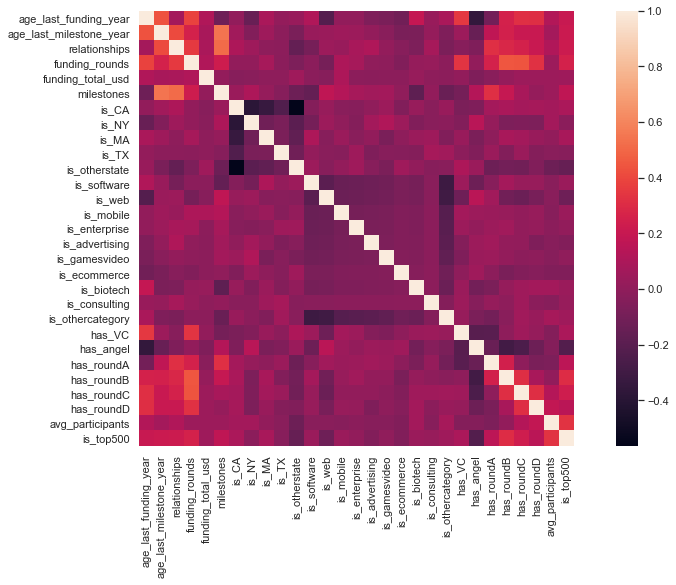

<Figure size 1440x1440 with 0 Axes>

In [194]:
sns.heatmap(data=corr, square=True)

plt.figure(figsize=(20,20))

In [23]:
# Separating features and target values
X = startup_num
y = startup_label

In [24]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=startup_num.columns)

### Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit_transform(X, y)

In [26]:
pd.DataFrame(bestfeatures.scores_, 
             index=X.columns, 
             columns=["feature_score"]).sort_values("feature_score", ascending=False).head(20)

,feature_score
has_roundB,24.153478
is_otherstate,20.437925
has_roundC,19.226351
is_top500,16.956659
has_roundD,16.327791
has_roundA,15.315353
relationships,12.986049
milestones,11.796463
funding_rounds,6.370929
is_MA,5.643581


In [27]:
from sklearn.feature_selection import f_classif

kbest2 = SelectKBest(score_func=f_classif, k=20)
feats = kbest2.fit_transform(X, y)

In [28]:
pd.DataFrame(kbest2.scores_, 
             index=X.columns,
             columns=["feature_score"]).sort_values("feature_score", ascending=False).head(20)

,feature_score
relationships,136.978779
age_last_milestone_year,135.851169
milestones,111.109470
is_top500,98.087263
has_roundB,41.392090
funding_rounds,40.482829
avg_participants,33.082326
has_roundA,32.119028
is_otherstate,26.955151
has_roundC,25.680778


In [29]:
feats.shape

(922, 20)

In [30]:
from sklearn.feature_selection import mutual_info_classif

kbest3 = SelectKBest(score_func=mutual_info_classif, k=20)
fit = kbest3.fit_transform(X, y)

In [31]:
pd.DataFrame(
    kbest3.scores_, 
    index=X.columns, 
    columns=["feature_score"]).sort_values("feature_score", ascending=False
                ).head(20)

,feature_score
relationships,0.133859
age_last_milestone_year,0.103193
milestones,0.073577
funding_total_usd,0.059494
is_top500,0.058786
avg_participants,0.051701
is_ecommerce,0.042692
funding_rounds,0.038533
age_last_funding_year,0.034714
is_consulting,0.027776
